In [ ]:
# 1) Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [36]:
# 2) import the train data

df = pd.read_csv("Week7_train.csv")


In [37]:
# 3. Check the shape of the data 

print("Shape of the df : " , df.shape)

Shape of the df :  (42000, 785)


In [38]:
# 4. Select only 10 % of the data form experiment

df_sample = df.sample(frac=0.1,random_state=42)

In [39]:
# 5. Print shape of selected dataset

print("Shape of sample dataset : " , df_sample.shape)

Shape of sample dataset :  (4200, 785)


In [40]:
# 6. Look at the top 5 rows

df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# 7. Find no of unique class labels

unique_labels = df_sample.iloc[:,0].nunique()

print("No of classes : ", unique_labels)


No of classes :  10


In [42]:
# 8. Print the no of examples for each class label


df_sample.iloc[:,0].value_counts()   # same as group by count in dbms

label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64

In [43]:
#  9. Prepare x and y

y = df_sample.iloc[:,0]
x = df_sample.iloc[:,1:]


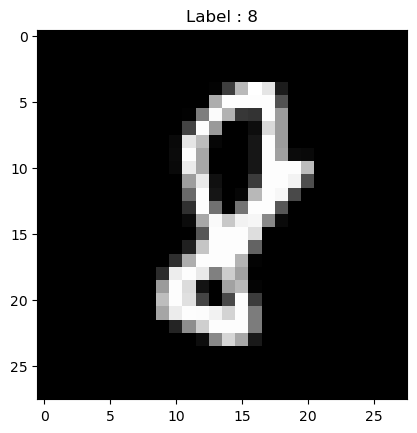

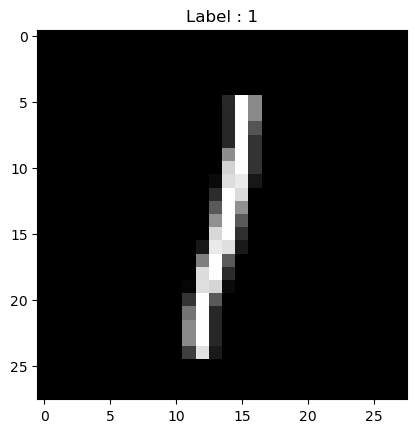

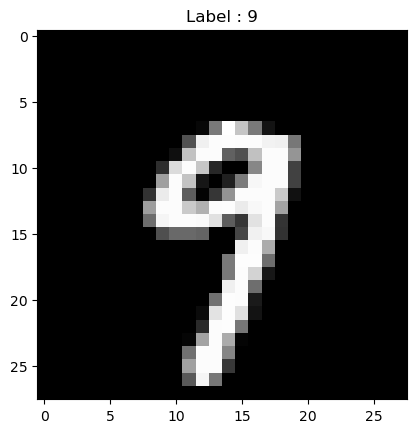

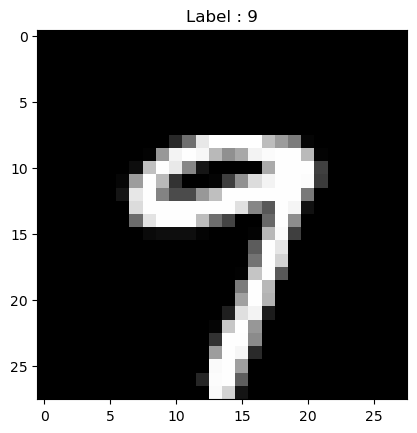

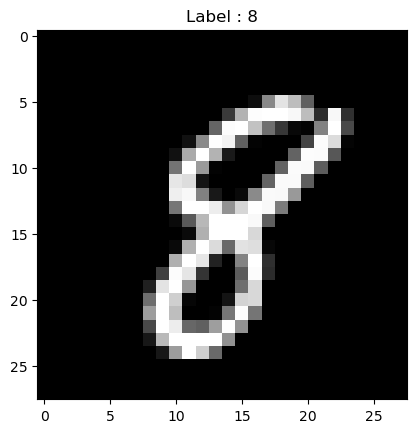

In [72]:
# Visualize the image of the first 4 in x and print the class label

for i in range(5) :
    img = x.iloc[i].values.reshape(28,28)
    plt.imshow(img,cmap='grey')
    plt.title(f"Label : {y.iloc[i]}")
    plt.show()

In [55]:
#  11. Split the train dataset into training set(75%) & validation set(25%)

x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.25, random_state=42)

In [60]:
# 12. Fit KNN classifies to training dat

model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [63]:
# 14. Predic the validation set results 

y_pred = model.predict(x_valid)

y_pred

array([9, 3, 6, ..., 1, 7, 9])

In [66]:
# 15.  Print the confusion matrix 

cm = confusion_matrix(y_valid,y_pred)
print(cm)

[[ 99   0   0   1   0   0   1   0   0   0]
 [  0 118   0   0   0   0   0   0   0   0]
 [  0   4  83   0   0   0   0   3   0   0]
 [  0   0   1 119   0   5   0   2   3   2]
 [  0   0   0   0  87   0   3   1   0   4]
 [  0   1   0   1   1  81   1   0   0   0]
 [  0   1   0   0   0   0  98   0   0   0]
 [  0   7   1   0   0   0   0 105   0   5]
 [  0   6   1   3   1   1   1   1  87   5]
 [  2   2   0   1   5   0   0   2   0  94]]


In [69]:
# 16. Print classitfication report and accuracy

print(classification_report(y_valid, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       101
           1       0.85      1.00      0.92       118
           2       0.97      0.92      0.94        90
           3       0.95      0.90      0.93       132
           4       0.93      0.92      0.92        95
           5       0.93      0.95      0.94        85
           6       0.94      0.99      0.97        99
           7       0.92      0.89      0.91       118
           8       0.97      0.82      0.89       106
           9       0.85      0.89      0.87       106

    accuracy                           0.92      1050
   macro avg       0.93      0.93      0.93      1050
weighted avg       0.93      0.92      0.92      1050



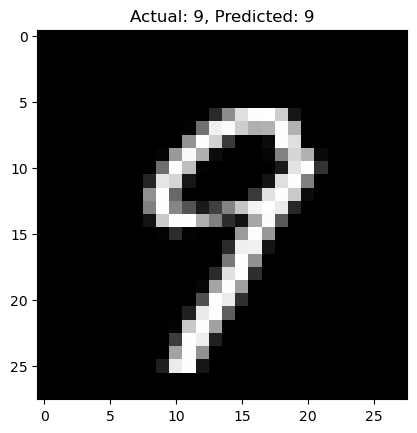

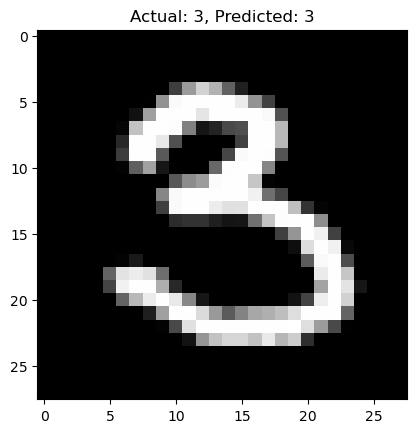

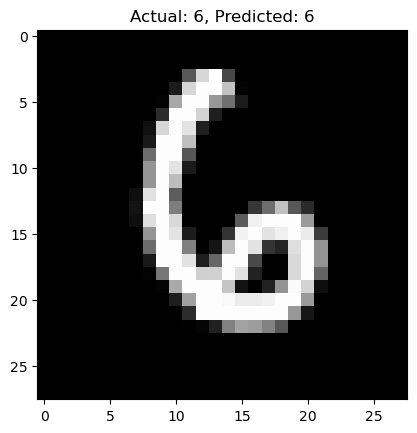

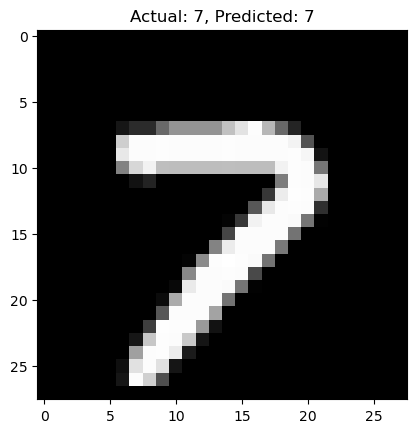

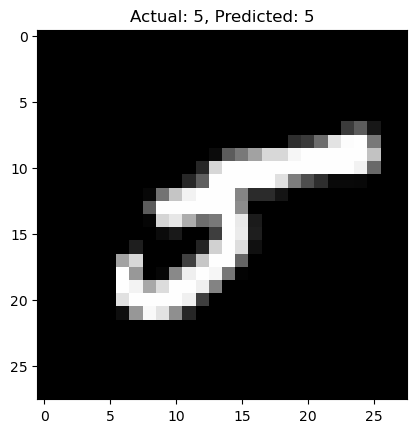

In [70]:
# 17. Visulaize the image of the first digits in x_test also print the predicted

for i in range(5):
    img = x_valid.iloc[i].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Actual: {y_valid.iloc[i]}, Predicted: {y_pred[i]}")
    plt.show()
